In [1]:
import sys
import os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
       
        return y
       
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
       
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.7833333333333333, 0.7889
train acc, test acc | 0.8765833333333334, 0.8809
train acc, test acc | 0.89955, 0.9037
train acc, test acc | 0.9095166666666666, 0.9122
train acc, test acc | 0.9154, 0.9185
train acc, test acc | 0.9209, 0.9232
train acc, test acc | 0.9255833333333333, 0.9273
train acc, test acc | 0.92915, 0.9303
train acc, test acc | 0.9324333333333333, 0.9356
train acc, test acc | 0.9358333333333333, 0.9383
train acc, test acc | 0.9382333333333334, 0.9391
train acc, test acc | 0.9410166666666666, 0.9409
train acc, test acc | 0.9434333333333333, 0.9441
train acc, test acc | 0.9455166666666667, 0.9451
train acc, test acc | 0.9472333333333334, 0.9463
train acc, test acc | 0.9484333333333334, 0.9479


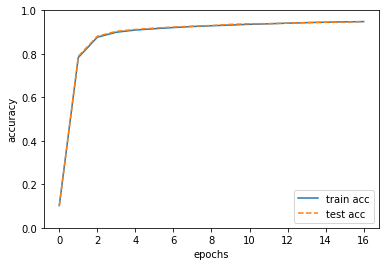

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) 

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) 

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) 

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 感想
学習時に微分を使うという伏線が回収された。
微分から出た勾配に従って更新するという仕組みであるとわかった。「微分しやすい」が威力を発揮しつつある。（微分しやすい上に目的に丁度良くマッチした関数を考えた先人には頭が下がる。）
「認識精度では微小変化に反応しない」の意味をもっと知りたいと思った。

### 参考文献
[深層学習による画像認識・生成](https://www.inf.uec.ac.jp/kobo2021/?%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E3%81%AB%E3%82%88%E3%82%8B%E7%94%BB%E5%83%8F%E8%AA%8D%E8%AD%98%E3%83%BB%E7%94%9F%E6%88%90#d16d8e7e)

[【ゼロから作るDeep Learning】4章 ニューラルネットワークの学習](https://yusuke-ujitoko.hatenablog.com/entry/2016/12/27/195809)